### 高斯混合模型

模拟两个正态分布的参数

In [1]:


from numpy import *
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import math
import matplotlib.mlab as mlab


### 生成均值不同的样本


In [15]:
EPS = 1e-4
def generate_data():
    mu1=2
    mu2=6
    sigma1=0.1
    sigma2=0.5
    alpha1=0.4
    alpha2=0.6
    N=5000
    N1=int(alpha1*N)
    X = mat(zeros((N,1)))
    for i in range(N1):
        u1 = random.uniform(-1,1)
        X[i] = u1*sigma1+mu1
    for i in range(N-N1):
        u1 = random.uniform(-1,1)
        X[i+N1] = u1*sigma2+mu2
    return X

EM算法

In [6]:
def GMM(X):
	k = 2
	N = len(X)
	mu = np.random.rand(k,1)
	print('init mu=',mu)
	Posterior = mat(zeros((N,k)))	
	sigma = np.random.rand(k,1)
	print ('init sigma=',sigma)
	alpha = np.random.rand(k,1)
	dominator = 0
	numerator = 0
	print ('init alpha=',alpha)
	#先求后验概率
	#print (sigma)
	for it in range(1000):
		for i in range(N):
			dominator = 0
			for j in range(k):
				dominator = dominator + np.exp(-1.0/(2.0*sigma[j]) * (X[i] - mu[j])**2)
				#print -1.0/(2.0*sigma[j]),(X[i] - mu[j])**2,-1.0/(2.0*sigma[j]) * (X[i] - mu[j])**2,np.exp(-1.0/(2.0*sigma[j]) * (X[i] - mu[j])**2)
				#return
			for j in range(k):
				numerator = np.exp(-1.0/(2.0*sigma[j]) * (X[i] - mu[j])**2)
				Posterior[i,j] = numerator/dominator			
		oldmu = copy.deepcopy(mu)
		oldalpha = copy.deepcopy(alpha)
		oldsigma = copy.deepcopy(sigma)
		#最大化	
		for j in range(k):
			numerator = 0
			dominator = 0
			for i in range(N):
				numerator = numerator + Posterior[i,j] * X[i]
				dominator = dominator + Posterior[i,j]
			mu[j] = numerator/dominator
			alpha[j] = dominator/N
			tmp = 0
			for i in range(N):
				tmp = tmp + Posterior[i,j] * (X[i] - mu[j])**2
				#print tmp,Posterior[i,j],(X[i] - mu[j])**2 
			sigma[j] = tmp/dominator
			#print (tmp)
			#print (dominator)
			#print (sigma[j])
		if ((abs(mu - oldmu)).sum() < EPS) and \
			((abs(alpha - oldalpha)).sum() < EPS) and \
			((abs(sigma - oldsigma)).sum() < EPS):
				print (str('final mu=')) 
				print (str(mu))
				print (str('final sigma='))
				print (str(sigma))
				print (str('final alpha='))
				print (str(alpha))
				print (it)
				break

### Main启动

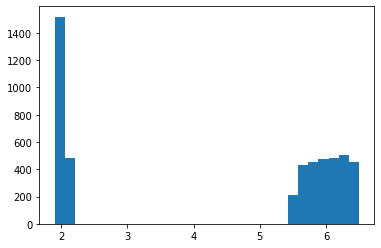

init mu= [[0.55904491]
 [0.10095519]]
init sigma= [[0.19478225]
 [0.83838078]]
init alpha= [[0.24434726]
 [0.52521789]]
final mu=
[[1.99951968]
 [6.01070331]]
final sigma=
[[0.00337386]
 [0.08105665]]
final alpha=
[[0.4]
 [0.6]]
6


In [17]:


X = generate_data()
plt.hist(X, 30)
plt.show()
GMM(X)	

